# 1.Preface

 
 YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. [According to Variety magazine](https://variety.com/2017/digital/news/youtube-2017-top-trending-videos-music-videos-1202631416/), “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for. In this paper we will explore Youtube trends using [Trending YouTube Video Statistics](https://www.kaggle.com/datasets/datasnaek/youtube-new) obtained from Kaggle.com.



# 2. Exploring and Importing

Import essential modules:

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import json

First let's unpack the archive and check it content:

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.virtual_documents',
 'CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'README.md',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json',
 'youtube_videos.ipynb']

And take a brief look at the data:

In [4]:
dfCA = pd.read_csv('CAvideos.csv', encoding='utf-8')
dfCA.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [5]:
with open('CA_category_id.json', 'r') as f:
    categoryData = json.load(f)
dfCategoryCA = pd.json_normalize(categoryData, record_path='items')
dfCategoryCA.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


As shown above, data is included for the US, GB, DE, CA, FR, RU, MX, KR, JP and IN regions (USA, Great Britain, Germany, Canada, and France, Russia, Mexico, South Korea, Japan and India respectively), with up to 200 listed trending videos per day.
Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count. The data also includes a category_id field, which varies between regions. Associated category can be found in corresponding *.json file.

Now we are going to combine separate files into one united dataframe with data for all regions:

In [6]:
# create a list of file names
csvFileNames = [file for file in os.listdir() if file.endswith('csv')]
jsonFileNames = [file for file in os.listdir() if file.endswith('json')]
fileNames = list(zip(csvFileNames, jsonFileNames))


In [7]:
# function creates df for each region
def makeRegionDF(csvFileName, jsonFileName):
    # discard unwanted columns while importing
    df = pd.read_csv(csvFileName, encoding='utf-8', usecols=
                     lambda x: x not in ['thumbnail_link', 'description'])
    df['region'] = csvFileName[:2]
    # import and transform json file
    with open(jsonFileName, 'r') as f:
        jsonData = json.load(f)
    categoryDF = pd.json_normalize(jsonData, record_path='items')
    categoryDF = categoryDF[['id', 'snippet.title']]
    categoryDF['id'] = categoryDF['id'].astype('float')
    categoryDF.rename(columns={'snippet.title': 'category',
                               'id': 'category_id'}, inplace=True)
    df = pd.merge(left=df, right=categoryDF, on='category_id')
    return df

In [8]:
# combine region data into final dataframe
regionDFlist = []
for file in list(fileNames):
    regionDFlist.append(makeRegionDF(*file))
df = pd.concat(regionDFlist, ignore_index=True)


In [9]:
# add country column
country = {'CA': 'Canada', 'US': 'United States', 'RU': 'Russia',
           'GB': 'Great Britain', 'MX': 'Mexico', 'JP': 'Japan',
           'KR': 'South Korea', 'IN': 'India', 'FR': 'France',
           'DE': 'Germany'}
df['country'] = df['region'].map(country)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373204 entries, 0 to 373203
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                373204 non-null  object
 1   trending_date           373204 non-null  object
 2   title                   373204 non-null  object
 3   channel_title           373204 non-null  object
 4   category_id             373204 non-null  int64 
 5   publish_time            373204 non-null  object
 6   tags                    373204 non-null  object
 7   views                   373204 non-null  int64 
 8   likes                   373204 non-null  int64 
 9   dislikes                373204 non-null  int64 
 10  comment_count           373204 non-null  int64 
 11  comments_disabled       373204 non-null  bool  
 12  ratings_disabled        373204 non-null  bool  
 13  video_error_or_removed  373204 non-null  bool  
 14  region                  373204 non-n

# 3. Popular Categories

## 3.1 Most popular categories

Let's find most popular categories on Youtube:

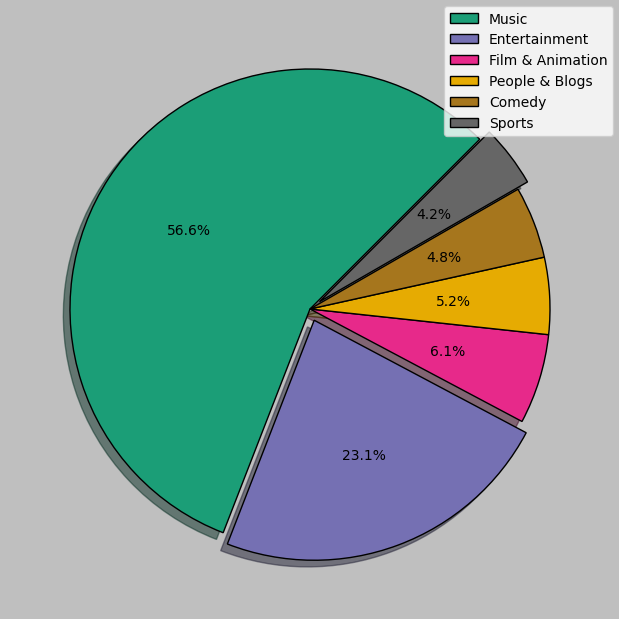

In [97]:
df1 = df.groupby('category').agg({'views': 'sum'}).sort_values(
    by='views', ascending=False)
df1 = df1.apply(lambda x: round(100 * x / float(x.sum()), 1))
df1 = df1.loc[df1['views'] >= 3]
# colormap and style
cmap = mpl.cm.get_cmap('Dark2')
categoryColors = [cmap(x) for x in np.linspace(0.1, 1, df1.shape[0])]
plt.style.use('grayscale')
explode = [0 for x in range(df1.shape[0])]
explode[1] = 0.05
explode[-1] = 0.05
# plot
fig, ax = plt.subplots(figsize=(12, 5))
fig.subplots_adjust(0.2,0,2,1.2)
pie = ax.pie(df1['views'],
             wedgeprops={'edgecolor': 'black'},
             colors=categoryColors, explode=explode,
             shadow=True, startangle=45, autopct='%1.1f%%')
legend = fig.legend(df1.index, loc='upper right')

## 3.2 Do people in the different countries prefer different video categories?

To address this question we will use sum of views for each category in each country. First, let's take top 5 most popular categories for each region:

In [98]:
df1 = df.groupby(['country', 'category']).agg({'views': 'sum'})
df1 = df1['views'].groupby('country', group_keys=False)
df1 = df1.apply(lambda x: x.sort_values(ascending=False).head(5))
df1


country        category        
Canada         Entertainment        13671215509
               Music                13179850194
               Comedy                3708438785
               People & Blogs        3228227926
               Sports                2997652188
France         Music                 5026447522
               Entertainment         3779500229
               Sports                1996811039
               Comedy                1896284649
               People & Blogs        1280843533
Germany        Entertainment         8102638694
               Music                 5683870646
               People & Blogs        2193613268
               Sports                1938192278
               Film & Animation      1757184336
Great Britain  Music               171160864769
               Entertainment        29786283041
               Film & Animation      8362707626
               People & Blogs        5754287829
               Comedy                3962062143
India   

This table is hard to read, so let's better create a plot. Also we will use percentage of total views instead of views count:

In [99]:
# calculate percentage of total
df2 = df1.groupby(level=0, group_keys=False).apply(
    lambda x: round(100 * x / float(x.sum()), 1))
df2 = df2.reset_index()


# create colorMap
category = df2['category'].unique()
cmap = mpl.cm.get_cmap('Dark2')
categoryColors = [cmap(x) for x in np.linspace(0, 1, len(category))]
colorMap = {category[i]: categoryColors[i] for i, _ in enumerate(category)}
df2['color'] = df2['category'].map(colorMap)




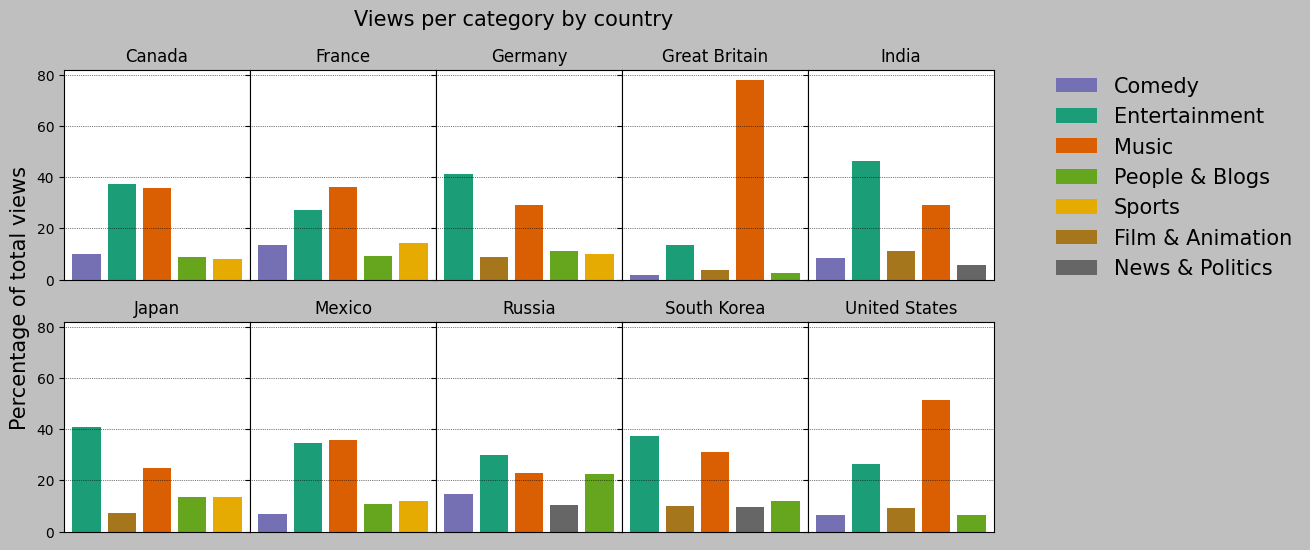

In [110]:
# create subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6),
                        subplot_kw={'xticks': []}, sharey=True)

# auxiliary variables
regionList = df2['country'].unique()
handles = []
labels = []

# plot bar charts
for i, region in enumerate(regionList):
    regionData = df2.groupby(
        'country').get_group(region).reset_index().sort_values(by='category')
    axs.flat[i].bar(regionData['category'], regionData['views'],
                    color=regionData['color'], label=regionData['category'])
    axs.flat[i].grid(visible=True, linestyle='dotted', linewidth=0.5)
    # get handles and labels for legend
    line = axs.flat[i].get_legend_handles_labels()
    for handle in line[0]:
        handles.append(handle)
    for label in line[1]:
        labels.append(label)
    axs.flat[i].set_title(regionData.loc[0, 'country'])
# get unique labels with dict
legendDict = {labels[i]: handles[i] for i, _ in enumerate(labels)}

legend = fig.legend(handles=legendDict.values(), labels=legendDict.keys(),
                    loc="lower center",
                    bbox_to_anchor=(1.05, 0.5), frameon=False, fontsize=15)
fig.subplots_adjust(wspace=0, hspace=0.2)
text = fig.text(0.08, 0.5, 'Percentage of total views', va='center',
                rotation='vertical', fontsize=15)
sup = fig.suptitle('Views per category by country',
                   fontsize=15)

As we can see, most people prefer Entertainment and Music videos on Youtube and this behavior doesn't change among regions. Other popular categories are News & Politics, People & Blogs, Film & Animation, Sports and Comedy. 